<a href="https://colab.research.google.com/github/bgeervani/VOIS_AICTE_Oct2025_MajorProject_BattulaGeervani/blob/main/NetflixMajor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

/tmp/ipython-input-4003286986.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


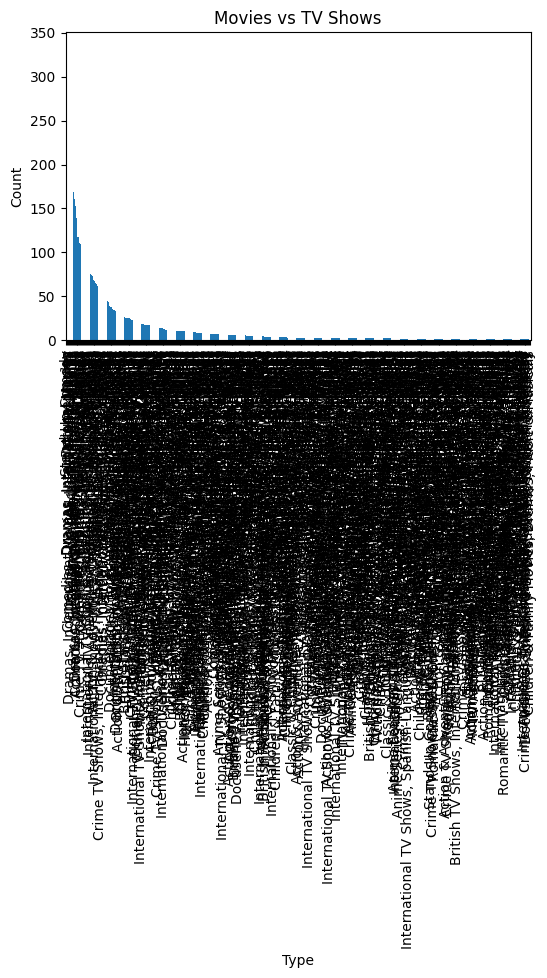

/tmp/ipython-input-4003286986.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


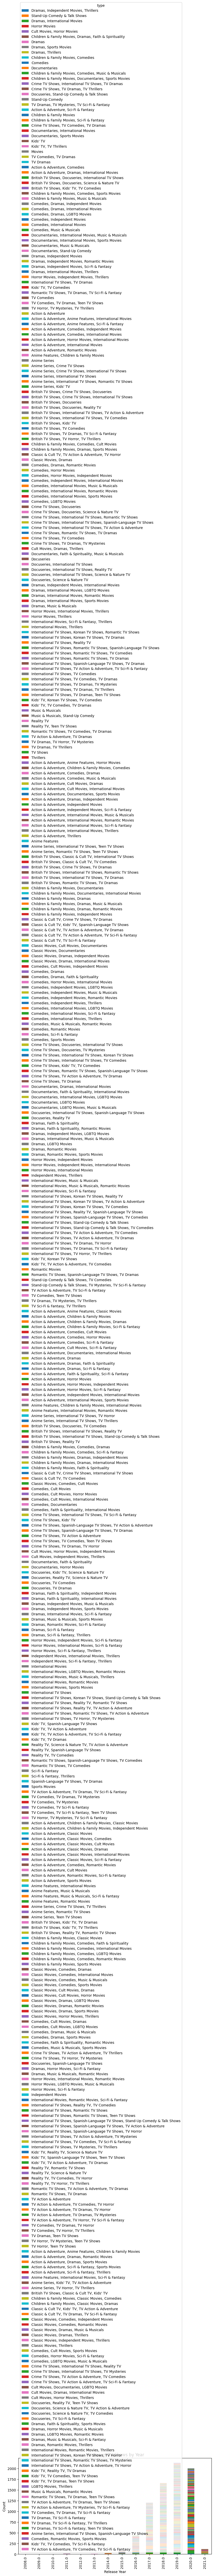

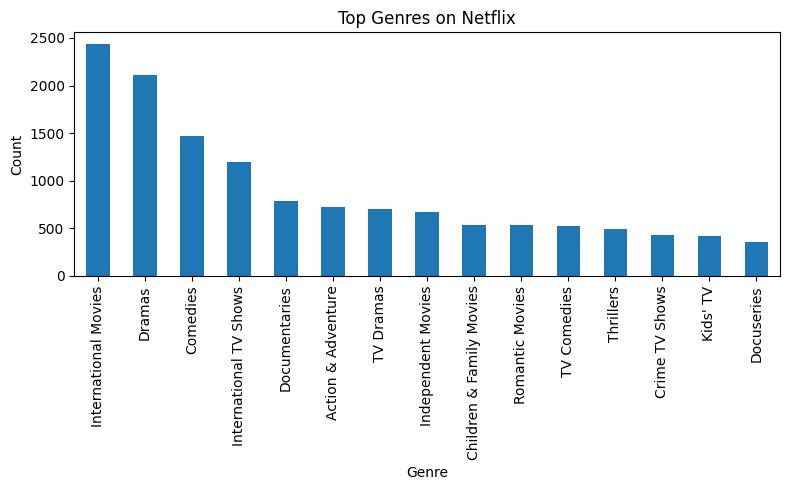

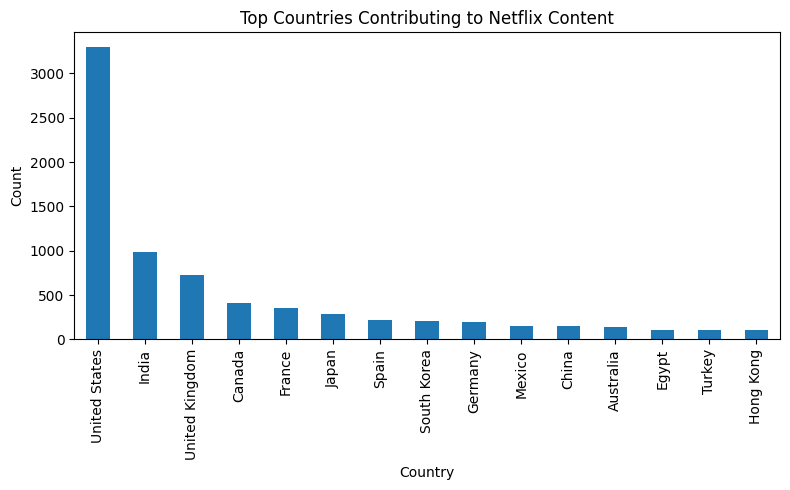

Analysis complete. Charts saved in current directory.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Netflix Dataset.csv")

# Display basic info
print(df.head())
print(df.info())

# Clean and preprocess
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = pd.to_numeric(df['release_date'].dt.year, errors='coerce')

# --- 1. Movies vs TV Shows Analysis ---
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
type_counts.plot(kind='bar')
plt.title("Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

# --- 2. Movies vs TV Shows by Year ---
by_year = df.groupby(['release_year','type']).size().unstack(fill_value=0)
by_year.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title("Movies vs TV Shows by Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows_by_year.png")
plt.show()

# --- 3. Genre Analysis ---
genres = df['type'].dropna().str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(15)
plt.figure(figsize=(8,5))
top_genres.plot(kind='bar')
plt.title("Top Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("top_genres.png")
plt.show()

# --- 4. Country-wise Contribution ---
countries = df['country'].dropna().str.split(',').explode().str.strip()
top_countries = countries.value_counts().head(15)
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar')
plt.title("Top Countries Contributing to Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("top_countries.png")
plt.show()

# Save processed data
df.to_csv("netflix_processed.csv", index=False)
print("Analysis complete. Charts saved in current directory.")